# **Analisis de Reviews de Spotify**

## **Problema de Negocio**

Spotify enfrenta problemas recurrentes de experiencia de usuario en su aplicación móvil, evidenciados en las reseñas de los usuarios. Los principales problemas identificados incluyen:

*   **Errores técnicos recurrentes**: La aplicación se cierra inesperadamente, se congela, o muestra pantallas negras.
*   **Problemas de reproducción**: La música o los podcasts se detienen aleatoriamente, el reproductor desaparece, y no se pueden controlar las pistas.
*   **Publicidad excesiva**: Los usuarios gratuitos reportan demasiados anuncios consecutivos, incluso después de pagar por Premium en algunos casos.
*   **Limitaciones en la versión gratuita**: No se puede elegir canciones específicas, límite de saltos, y reproducción aleatoria forzada.
*   **Problemas de integración**: Dificultades con Alexa, Android Auto y otros dispositivos.

Estos problemas están afectando la satisfacción del usuario, la retención de clientes y la percepción de la marca, especialmente entre usuarios de Android.



# **Usuario Final**

*   **Product Managers:** Para priorizar mejoras basadas en feedback real de usuarios
*   **Desarrolladores:** Para identificar bugs específicos y problemas técnicos recurrentes
*   **Diseñadores UX/UI**: Para comprender puntos de dolor en la experiencia de usuario



# **Objetivo**

Identificar los factores clave que impactan la satisfacción del usuario a partir de las reseñas, para proponer mejoras específicas en la aplicación que reduzcan la tasa de abandono y aumenten las puntuaciones positivas.

**Objetivos específicos:**

1.   Clasificar las reseñas por temáticas recurrentes (bugs, anuncios, usabilidad, etc.).
2.   Relacionar la puntuación (Rating) con el contenido textual de las reseñas.
3.   Identificar cuáles son los problemas más urgentes según la cantidad de "me gusta" (Total_thumbsup) y la frecuencia de mención.

# **Dataset**

Este dataset se obtuvo de kaggle, al cual pueden acceder a travez de este link: https://www.kaggle.com/datasets/mfaaris/spotify-app-reviews-2022. A su vez fue cargado a un repositorio de GitHub para luego cargarlo desde ahi a este proyecto. Pueden acceder al mismo desde este link: https://github.com/Francisco-33/Bases (Spotify-Reviews.csv).

El dataset nos presenta las reviews de la aplicación Spotify durante el año 2022. Cuenta con 61224 filas y 4 columnas: Date, Review, Rating y Total_thumbsup.

# **Diccionario de Variables**

*   **Date**: Fecha en la que cargo la review.
*   **Review**: Comentario realizado por un usuario de Spotify
*   **Rating**: Calificación numerica que da el usuario sobre la aplicación (del 1 al 5)
*   **Total_thumbsup**: Nos muestra la cantidad de "Me gusta" brindados por otros usuarios sobre cada review.

# **Data wrangling**

**Importamos las librerías**

In [ ]:
# Instalación de librerías necesarias (solo la primera vez)
!pip install -q nltk spacy     # NLP con NLTK y spaCy
!pip install -q tensorflow     # Framework para Deep Learning
!pip install -upgrade tensorflow
!pip install -q scikit-learn   # Algoritmos clásicos de ML
!pip install -q matplotlib seaborn # Visualización
!python -m spacy download en_core_web_sm  # Modelo de spaCy en inglés
!pip install -U spacy
!pip install -q wordcloud
!pip install -q gdown


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 81.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import numpy as np

import gdown
import re
import chardet

# Tokenización
import nltk
nltk.download('punkt')  # Descargamos el paquete de tokenización de NLTK
nltk.download('punkt_tab')  # Descargamos el paquete de tokenización de NLTK
from nltk.tokenize import word_tokenize # Desde el módulo nltk.tokenize, quiero importar solo la función word_tokenize

# Stopwords
import nltk
nltk.download('stopwords') # Descargamos el paquete de stopwords de NLTK para poder usarlas en el código
from nltk.corpus import stopwords# Importamos el módulo de stopwords desde NLTK, que contiene listas de palabras vacías

# Lematización
nltk.download('wordnet')  # Base de datos léxica de WordNet para lematización en inglés
from nltk.stem import WordNetLemmatizer # Importar el WordNetLemmatizer de nltk

# Counter para las palabras con mayor frecuencia
from collections import Counter

# visualizaciones
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# WordCloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer  # Para convertir texto en vectores de frecuencia

# Analisis de sentimiento
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Modelos ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, Dropout, GRU

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


**Cargamos el Dataset**


In [ ]:
# Configura pandas para mostrar todo el contenido de cada celda (sin truncar)
pd.set_option('display.max_colwidth', None)

In [ ]:
# Cargamos el Dataset, al cual llamamos desde un URL en un repositorio en GitHub
url = 'https://raw.githubusercontent.com/Francisco-33/Bases/refs/heads/main/Spotify-Reviews.csv'
df = pd.read_csv(url, sep=';', encoding='latin1')

**Mostramos la información inicial**

In [ ]:
print(f"Dimensiones del dataset: {df.shape}")

Dimensiones del dataset: (61224, 4)


In [ ]:
print(f"\nColumnas: {list(df.columns)}")


Columnas: ['Date', 'Review', 'Rating', 'Total_thumbsup']


**Buscamos valores nulos o duplicados**

In [ ]:
df.isnull().sum()

,0
Date,0
Review,0
Rating,0
Total_thumbsup,0


Podemos observar que el dataset no contiene valores nulos.

In [ ]:
print('DUPLICADOS')
print(f'Filas duplicadas: {df.duplicated().sum()}')

DUPLICADOS
Filas duplicadas: 3


Vemos que tenemos 3 valores duplicados, los cuales vamos a eliminar como veremos mas abajo.

In [ ]:
df = df.drop_duplicates()

In [ ]:
print('DUPLICADOS')
print(f'Filas duplicadas: {df.duplicated().sum()}')

DUPLICADOS
Filas duplicadas: 0


Los valores duplicados fueron eliminados.

In [ ]:
print(f"\nTipos de datos:")
print(df.dtypes)


Tipos de datos:
Date              object
Review            object
Rating             int64
Total_thumbsup     int64
dtype: object


In [ ]:
print(f"\nPrimeras 5 filas:")
display(df.head(5))


Primeras 5 filas:


,Date,Review,Rating,Total_thumbsup
0,9/7/2022,"Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.",5,2
1,9/7/2022,Please ignore previous negative rating. This app is super great. I give it five stars+,5,1
2,9/7/2022,"This pop-up ""Get the best Spotify experience on Android 12"" is too annoying. Please let's get rid of this.",4,0
3,9/7/2022,Really buggy and terrible to use as of recently,1,1
4,9/7/2022,Dear Spotify why do I get songs that I didn't put on my playlist??? And why do we have shuffle play?,1,1


**Mostramos las dimensiones del DataFrame, los nombres de las columnas y los tipos de datos.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61221 entries, 0 to 61223
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            61221 non-null  object
 1   Review          61221 non-null  object
 2   Rating          61221 non-null  int64 
 3   Total_thumbsup  61221 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


# **Normalización de los Datos**

Covertimos la variable Date a formato fecha.

In [ ]:
# Convertir Date a formato datetime:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
# Extraemos componentes temporales (Año, Mes, Día)
df['Año'] = df['Date'].dt.year
df['Mes'] = df['Date'].dt.month
df['Dia'] = df['Date'].dt.day

print('Date: ',df['Date'].dtype)

Date:  datetime64[ns]


 **Pasamos el texto a minuscula**

In [ ]:
df['review_lower'] = df['Review'].apply(lambda text: text.lower())

In [ ]:
# Visualizamos el Dataset para comparar la variable Review original, con la nueva variable con el texto pasado a minusculas.
display(df.head(5))

,Date,Review,Rating,Total_thumbsup,Año,Mes,Dia,review_lower
0,2022-07-09,"Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.",5,2,2022,7,9,"great music service, the audio is high quality and the app is easy to use. also very quick and friendly support."
1,2022-07-09,Please ignore previous negative rating. This app is super great. I give it five stars+,5,1,2022,7,9,please ignore previous negative rating. this app is super great. i give it five stars+
2,2022-07-09,"This pop-up ""Get the best Spotify experience on Android 12"" is too annoying. Please let's get rid of this.",4,0,2022,7,9,"this pop-up ""get the best spotify experience on android 12"" is too annoying. please let's get rid of this."
3,2022-07-09,Really buggy and terrible to use as of recently,1,1,2022,7,9,really buggy and terrible to use as of recently
4,2022-07-09,Dear Spotify why do I get songs that I didn't put on my playlist??? And why do we have shuffle play?,1,1,2022,7,9,dear spotify why do i get songs that i didn't put on my playlist??? and why do we have shuffle play?


**Quitamos signos de puntuación**

In [ ]:
# Definir una función que remueva los signos de puntuación usando re
def remove_punctuation(text):
    # Expresión regular para reemplazar cualquier signo de puntuación o símbolo no alfanumérico
     return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Aplicar la función a la columna 'review_lower'
df['review_puntuacion'] = df['review_lower'].apply(remove_punctuation)

In [ ]:
# Visualizamos y comparamos la nueva columna sin signos de puntuación.
display(df.head(5)[['Review', 'review_lower', 'review_puntuacion']])

,Review,review_lower,review_puntuacion
0,"Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.","great music service, the audio is high quality and the app is easy to use. also very quick and friendly support.",great music service the audio is high quality and the app is easy to use also very quick and friendly support
1,Please ignore previous negative rating. This app is super great. I give it five stars+,please ignore previous negative rating. this app is super great. i give it five stars+,please ignore previous negative rating this app is super great i give it five stars
2,"This pop-up ""Get the best Spotify experience on Android 12"" is too annoying. Please let's get rid of this.","this pop-up ""get the best spotify experience on android 12"" is too annoying. please let's get rid of this.",this popup get the best spotify experience on android 12 is too annoying please lets get rid of this
3,Really buggy and terrible to use as of recently,really buggy and terrible to use as of recently,really buggy and terrible to use as of recently
4,Dear Spotify why do I get songs that I didn't put on my playlist??? And why do we have shuffle play?,dear spotify why do i get songs that i didn't put on my playlist??? and why do we have shuffle play?,dear spotify why do i get songs that i didnt put on my playlist and why do we have shuffle play


# **Tokenización**

In [ ]:
# Tokenizamos los valores de la columna 'review'
df['review_token'] = df['review_puntuacion'].apply(word_tokenize)


# Mostramos las primeras filas con la columna original y de la columna tokenizada
display(df.head(5)[['Review', 'review_token']])

,Review,review_token
0,"Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.","[great, music, service, the, audio, is, high, quality, and, the, app, is, easy, to, use, also, very, quick, and, friendly, support]"
1,Please ignore previous negative rating. This app is super great. I give it five stars+,"[please, ignore, previous, negative, rating, this, app, is, super, great, i, give, it, five, stars]"
2,"This pop-up ""Get the best Spotify experience on Android 12"" is too annoying. Please let's get rid of this.","[this, popup, get, the, best, spotify, experience, on, android, 12, is, too, annoying, please, lets, get, rid, of, this]"
3,Really buggy and terrible to use as of recently,"[really, buggy, and, terrible, to, use, as, of, recently]"
4,Dear Spotify why do I get songs that I didn't put on my playlist??? And why do we have shuffle play?,"[dear, spotify, why, do, i, get, songs, that, i, didnt, put, on, my, playlist, and, why, do, we, have, shuffle, play]"


# **Removemos Stopwords**

In [ ]:
# Obtenemos el listado de stopwords en ingles
stopwords_eng = stopwords.words('english')

# Aplicamos una función lambda a cada fila de la columna 'review_token'
df['review_token_sin_stopwords'] = df['review_token'].apply(lambda tokens: [word for word in tokens if word not in stopwords_eng])

In [ ]:
# Sumamos las palabras Spotify y app ya que se las considera redundantes.
stopwords_eng.extend(['Spotify', 'app'])

In [ ]:
# Vemos las columas con y sin Stopwords
display(df.head(5)[['review_token', 'review_token_sin_stopwords']])

,review_token,review_token_sin_stopwords
0,"[great, music, service, the, audio, is, high, quality, and, the, app, is, easy, to, use, also, very, quick, and, friendly, support]","[great, music, service, audio, high, quality, app, easy, use, also, quick, friendly, support]"
1,"[please, ignore, previous, negative, rating, this, app, is, super, great, i, give, it, five, stars]","[please, ignore, previous, negative, rating, app, super, great, give, five, stars]"
2,"[this, popup, get, the, best, spotify, experience, on, android, 12, is, too, annoying, please, lets, get, rid, of, this]","[popup, get, best, spotify, experience, android, 12, annoying, please, lets, get, rid]"
3,"[really, buggy, and, terrible, to, use, as, of, recently]","[really, buggy, terrible, use, recently]"
4,"[dear, spotify, why, do, i, get, songs, that, i, didnt, put, on, my, playlist, and, why, do, we, have, shuffle, play]","[dear, spotify, get, songs, didnt, put, playlist, shuffle, play]"


# **Lematización**

In [ ]:
# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Aplicar la lematización a la columna 'review_tokenizado_sin_stopwords'
df['review_lema'] = df['review_token_sin_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

# Vemos las columas con y sin Stopwords
display(df.head(5)[['review_token_sin_stopwords', 'review_lema']])

,review_token_sin_stopwords,review_lema
0,"[great, music, service, audio, high, quality, app, easy, use, also, quick, friendly, support]","[great, music, service, audio, high, quality, app, easy, use, also, quick, friendly, support]"
1,"[please, ignore, previous, negative, rating, app, super, great, give, five, stars]","[please, ignore, previous, negative, rating, app, super, great, give, five, star]"
2,"[popup, get, best, spotify, experience, android, 12, annoying, please, lets, get, rid]","[popup, get, best, spotify, experience, android, 12, annoying, please, let, get, rid]"
3,"[really, buggy, terrible, use, recently]","[really, buggy, terrible, use, recently]"
4,"[dear, spotify, get, songs, didnt, put, playlist, shuffle, play]","[dear, spotify, get, song, didnt, put, playlist, shuffle, play]"


# **Analisis Exploratorio de datos (EDA)**

A continuación vamos a desglozar algunas metricas clave del Dataset

# **Distribución de Ratings**

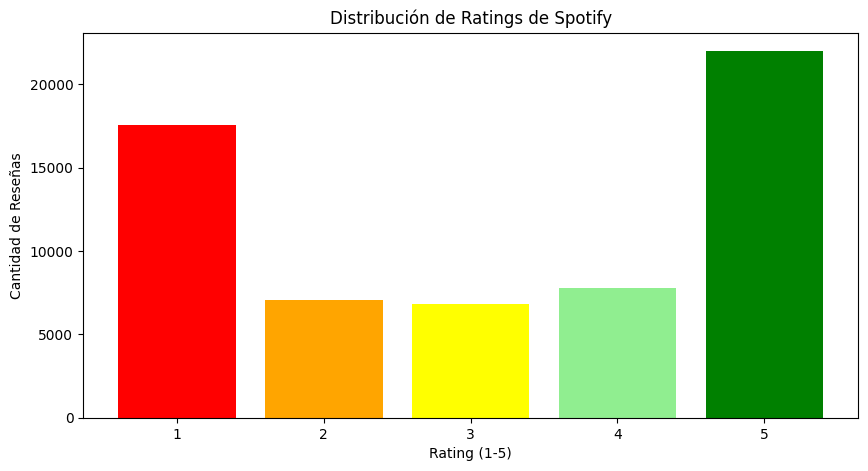


 Distribución de Ratings:
  Rating 1: 17552 reseñas (28.7%)
  Rating 2: 7060 reseñas (11.5%)
  Rating 3: 6834 reseñas (11.2%)
  Rating 4: 7787 reseñas (12.7%)
  Rating 5: 21988 reseñas (35.9%)


In [ ]:
# Distribución de ratings
plt.figure(figsize=(10, 5))
rating_counts = df['Rating'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values, color=['red', 'orange', 'yellow', 'lightgreen', 'green'])
plt.xlabel('Rating (1-5)')
plt.ylabel('Cantidad de Reseñas')
plt.title('Distribución de Ratings de Spotify')
plt.xticks([1, 2, 3, 4, 5])
plt.show()

print(f"\n Distribución de Ratings:")
for rating, count in rating_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  Rating {rating}: {count} reseñas ({percentage:.1f}%)")

Podemos observar que los ratings de 2, 3 y 4 estrellas se mantienen bastante parejos, las reseñas con 5 estrellas ocupan el 35% del total del dataset, mientas que las de 1 estrella ocupan el 28%, mostrando una polaridad clara entre el puntaje mas bajo y el mas alto. Esto demuestra que, en la mayoría de las reseñas, los usuarios tienen una experiencia de extremo positiva como de extremo negativa. Se recomienda una investigación que pérmita mejorar la experiencia y disminuir los puntajes negativos.

# **Diccionario de palabras clave**

Vamos a crear un diccionario de palabras clave, donde vamos a listar distintas categorías y las palabras que se relacionan a ellas.
Por ejemplo: La categoría "bugs" contiene las palabras 'crash', 'bug', 'glitch', 'freeze', 'error' y 'not working'.
La idea es que cuando se mencionan esas palabras dentro de la categoría, se contabilizarán para saber con cuantas menciones cuentan cada una de ellas. Esto nos dará un primer vistazo a donde esta puesto el foco general de las reseñas.

In [ ]:
# Palabras clave a buscar
keywords = {
    'bugs': ['crash', 'bug', 'glitch', 'freeze', 'error', 'not working'],
    'ads': ['ad', 'advertisement', 'commercial'],
    'premium': ['premium', 'subscription', 'pay', 'expensive'],
    'music': ['song', 'music', 'playlist', 'artist'],
    'app': ['app', 'application', 'mobile']
}

def count_keywords(text, keyword_list):
    """Contar ocurrencias de palabras clave"""
    count = 0
    text_lower = text.lower()
    for word in keyword_list:
        if word in text_lower:
            count += 1
    return count

# Contar menciones por categoría
for category, words in keywords.items():
    df[f'count_{category}'] = df['review_lower'].apply(lambda x: count_keywords(x, words))

# Resumen de menciones
print("\n Menciones por categoría:")
for category in keywords.keys():
    total_mentions = df[f'count_{category}'].sum()
    print(f"  {category.capitalize()}: {total_mentions} menciones")


 Menciones por categoría:
  Bugs: 7247 menciones
  Ads: 23252 menciones
  Premium: 13371 menciones
  Music: 52131 menciones
  App: 31892 menciones


A las categorías *Bugs* y *Ads* las podemos relacionar a una experiencia a lo mejor desfavorable para los usuarios, pudiendo estar relacionado con problemas del funcionamiento de la app como una molestia generalizada con los anuncios y comerciales que ofrece la experiencia gratuita, siendo la categoría Ads la mas mecionada de las dos con 23252 menciones cobre 7247 de bugs.
Por otro lado, a las categorías *Music* y *App* podemos interpretarlas como menciones mas generalizadas, ya que estamos hablando de una aplicación de música, damos por entendido que todas las reseñas van a mencionar esas palabras o sus derivados ya sea para comentario negativos como positivos.

# **Top 10 Reseñas con mas "Me gusta" y analisis de sentimiento**

En esta sección vamos a listar las 10 reseñas con mas "me gusta" recibidos. Esto nos dará un pantallazo de las experiencias mas destacadas de los usuarios y la importancia que le da la comunidad a ellas. Tambien agregamos un analisis de sentimiento a para tener una idea generalizada de la intención del comentario.

In [ ]:
# Obtener las 10 reseñas con más "me gusta"
top_10 = df.nlargest(10, 'Total_thumbsup').reset_index(drop=True)

def analyze_sentiment(text):
    """Análisis de sentimiento con TextBlob"""
    analysis = TextBlob(text)

    # Polaridad: -1 (negativo) a 1 (positivo)
    polarity = analysis.sentiment.polarity

    # Clasificar basado en polaridad
    if polarity > 0.1:
        return 'positivo'
    elif polarity < -0.1:
        return 'negativo'
    else:
        return 'neutral'

# Crear una tabla bonita
print("\n" + "-"*100)
print(f"{'#':<3} {'👍':<4} {'⭐':<3} {'RESEÑA (primeros 60 caracteres)':<60} {'Sentimiento'}")
print("-"*100)

for idx, row in top_10.iterrows():
    # Acortar la reseña para mostrar
    reseña_corta = row['Review'][:60]+ "..." if len(row['Review']) > 60 else row['Review']
    sentimiento = analyze_sentiment(row['Review'])
    print(f"{idx+1:<3} {row['Total_thumbsup']:<6} {row['Rating']:<3} {reseña_corta:<60} {sentimiento}")


----------------------------------------------------------------------------------------------------
#   👍    ⭐   RESEÑA (primeros 60 caracteres)                              Sentimiento
----------------------------------------------------------------------------------------------------
1   8195   4   The app is very good. I got to explore many new songs. Howev... positivo
2   6026   1   Forever glitchy. App play button and current song playing di... neutral
3   5336   4   there was a drop down thing that I think has recently got re... neutral
4   4777   5   Fantastic app. Have always had a great experience with this ... positivo
5   4749   3   Edit April 13: the reliability and stability of Spotify has ... positivo
6   4550   3   The app is really incredible and allows you to pick from so ... positivo
7   4267   2   The sound quality is amazing , I've been using the app for s... positivo
8   3049   4   Personally, I think the app is great. It has tonnes of songs... positivo
9   2945 

Vemos que en lineas generales las 10 reseñas con mas "me gusta" son positivas.

In [ ]:
indice_max = df['Total_thumbsup'].idxmax()
reseña_max = df.loc[indice_max]

print(f"Índice de la reseña con más me gusta: {indice_max}")
print(f"Número me gusta: {reseña_max['Total_thumbsup']}")
print(f"\nReseña:\n\"{reseña_max['Review']}\"")

Índice de la reseña con más me gusta: 36760
Número me gusta: 8195

Reseña:
"The app is very good. I got to explore many new songs. However, I took out a star because of a few reasons. First:- It sometimes lags and won't show the music dialog box on your screen or in the app and for this I have to restart it. Second:- I cannot delete my history on phone. Third:- I cannot shuffle playlists or Albums. They have to play on the fixed sequence. Fourth:- I cannot see which song is going to play next if it's a radio and Fifth:- Sometimes the song stops and doesn't start radio"


En este apartado podemos observar que la reseña con el indice 36760 es la mas reaccionada por los usuarios con un total de 8195 "me gusta".
Si prestamos atención, la reseña es positiva, el usuario describe una buena expreciencia con la app, aunque deja en detalle distintos errores y malfuncionamientos a los que se debería prestar atención y ver la manera de resolver, ya que, mas allá de que las fallas no sean tan graves, hay 8195 usuarios que al dar "me gusta" opinan lo mismo, pudiendo suponer que sufren de esas mismas fallas.

# **Listamos las palabras con mayor frecuencia**

In [ ]:
# Unimos todos los tokens lematizados en una sola lista
tokens_lematizados = [token for tokens_list in df['review_lema'] for token in tokens_list]

# Contamos la frecuencia de cada palabra
frecuencia_palabras_lematizadas = Counter(tokens_lematizados)

# Mostramos las 20 palabras más comunes
frecuencia_palabras_lematizadas.most_common(20)

[('app', 35264),
 ('song', 32681),
 ('music', 25396),
 ('spotify', 18598),
 ('play', 13409),
 ('ad', 10239),
 ('playlist', 10053),
 ('like', 9845),
 ('listen', 9259),
 ('cant', 9039),
 ('love', 8984),
 ('premium', 8867),
 ('good', 8673),
 ('great', 7241),
 ('dont', 7073),
 ('even', 6923),
 ('time', 6596),
 ('im', 6547),
 ('get', 6534),
 ('want', 6385)]

**Creamos un grafico de barras con esos datos**

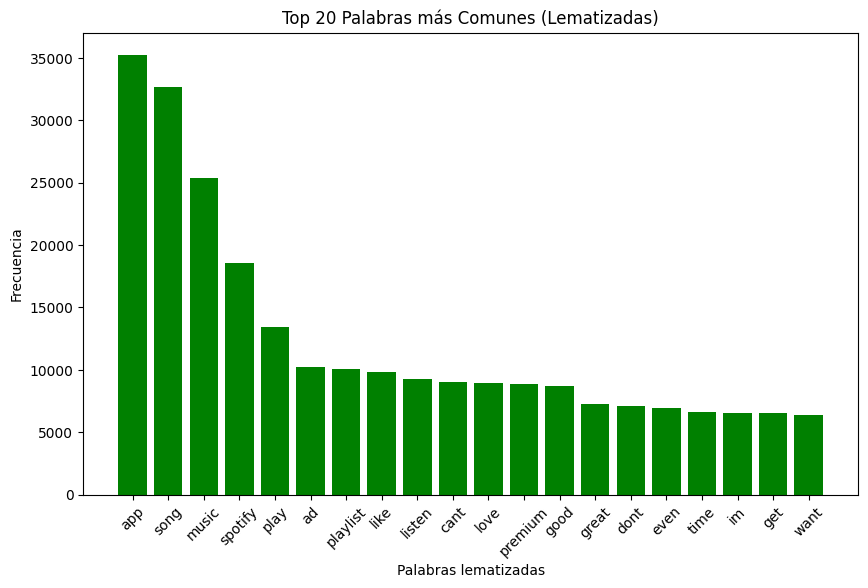

In [ ]:
# Obtenemos las 20 palabras más comunes y sus frecuencias
palabras_lem, frecuencias_lem = zip(*frecuencia_palabras_lematizadas.most_common(20))

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustamos el tamaño del gráfico
plt.bar(palabras_lem, frecuencias_lem, color='green')

# Añadimos etiquetas y título
plt.xlabel('Palabras lematizadas')
plt.ylabel('Frecuencia')
plt.title('Top 20 Palabras más Comunes (Lematizadas)')

# Rotamos las etiquetas del eje X para que se lean mejor
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.show()

# **Wordcloud**

A modo de primer vistazo del sentimiento de las reviews, vamos a generar wordclous para las reseñas en general y tambien las positivas y las negativas.

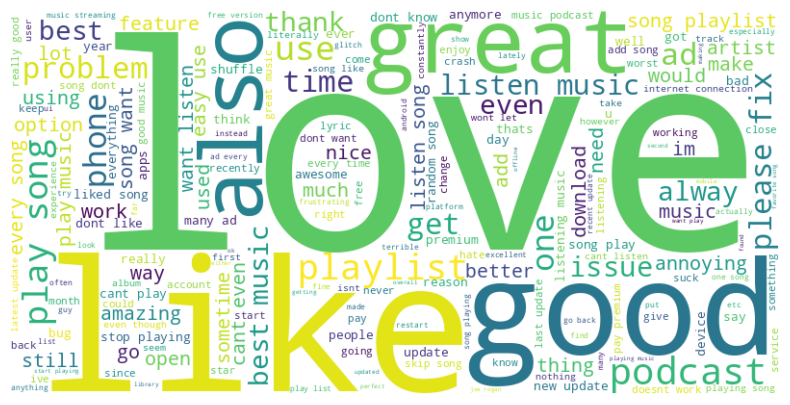

In [ ]:
df['review_lema_str'] = df['review_lema'].apply(lambda x: " ".join(x))
text = " ".join(df['review_lema_str'])

# Generar la WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_eng).generate(text)

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))

plt.imshow(wordcloud, interpolation='bilinear')
# Muestra la nube de palabras en la figura, usando interpolación bilineal para suavizarla.

plt.axis('off')
# Oculta los ejes de la figura para una mejor visualización.

plt.show()

**Wordcloud de reseñas Positivas**

/tmp/ipython-input-2414762119.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['review_lema_str'] = df_pos['review_lema'].apply(lambda x: " ".join(x))


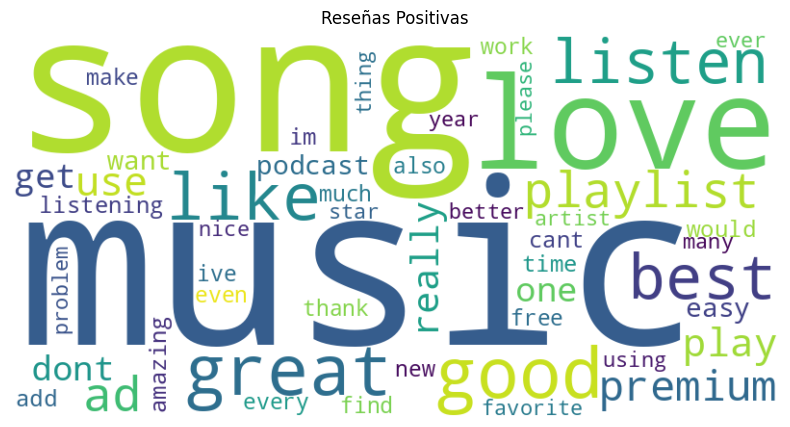

In [ ]:
# Wordcloud de reseñas positivas.
df_pos = df[df['Rating'] > 3]

# Convertir listas de tokens en cadenas
df_pos['review_lema_str'] = df_pos['review_lema'].apply(lambda x: " ".join(x))
# Unir todo en un solo texto
text_pos = " ".join(df_pos['review_lema_str'])

# Generar WordCloud positivo
wordcloud_pos = WordCloud(width=800, height=400, collocations = False, max_words = 50,  background_color='white', stopwords=stopwords_eng).generate(text_pos)

# Mostrar
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("Reseñas Positivas")
plt.axis('off')
plt.show()

**WordCloud de reseñas Negativas**

/tmp/ipython-input-2065183804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg['review_lema_str'] = df_neg['review_lema'].apply(lambda x: " ".join(x))


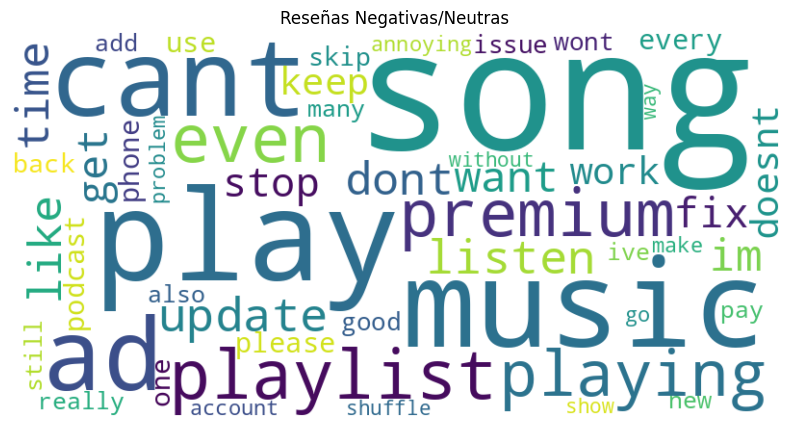

In [ ]:
df_neg = df[df['Rating'] < 3]

df_neg['review_lema_str'] = df_neg['review_lema'].apply(lambda x: " ".join(x))
text_neg = " ".join(df_neg['review_lema_str'])

# Generar WordCloud negativo
wordcloud_neg = WordCloud(width=800, height=400,collocations = False, max_words = 50, background_color='white', stopwords=stopwords_eng).generate(text_neg)

# Mostrar
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Reseñas Negativas/Neutras")
plt.axis('off')
plt.show()

***Algunos insights:***

**Wordcloud en general:** Nos muestra los terminos mas recurrentes en todas las reseñas, centrandose en la experiencia general de los usuarios.

**Wordcloud Positivo:** Se observa una experiencia favorable de los ususarios, ya que observamos adjetivos como love, great y best.

**Wordcloud Negativo:** Vemos palabras como annoying, problem y fix, lo que nos sugiere problemas recurrentes de los usuarios.

Una primera interpretación podria ser que, en lineas generales, la experiencia del usuario es satisfactoria, pero aun así, la aplicación cuenta con bugs y fallas tecnicas que entorpecen el uso de la misma, derivando en reviews negativas y un posible abandono de la aplicación de parte de los usuarios.

# **Analisis de Sentimiento (VADER)**

/tmp/ipython-input-1692118505.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist_abs.index, y=dist_abs.values, palette=['#d62728','#7f7f7f','#2ca02c'])


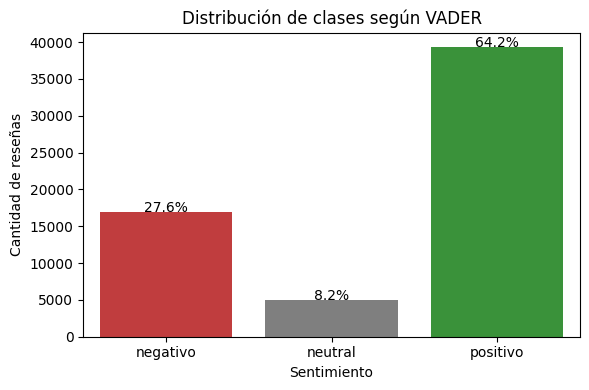

Distribución porcentual de sentimientos (%):
           Porcentaje
Sentiment            
negativo         27.6
neutral           8.2
positivo         64.2


In [ ]:
sia = SentimentIntensityAnalyzer()

#Función para calcular puntaje compuesto
def score_sent(texto):
    return sia.polarity_scores(texto)['compound'] if isinstance(texto, str) else 0.0

df['sent_score'] = df['Review'].apply(score_sent)

#Función para convertir puntaje a etiqueta
def to_label(s):
    if s >= 0.05:
        return 'positivo'
    elif s <= -0.05:
        return 'negativo'
    else:
        return 'neutral'

df['Sentiment'] = df['sent_score'].apply(to_label)

# Distribución absoluta y porcentual
dist_abs = df['Sentiment'].value_counts().reindex(['negativo','neutral','positivo'])
dist_pct = dist_abs / dist_abs.sum() * 100

# Gráfico de barras con porcentajes
plt.figure(figsize=(6,4))
sns.barplot(x=dist_abs.index, y=dist_abs.values, palette=['#d62728','#7f7f7f','#2ca02c'])
plt.title('Distribución de clases según VADER')
plt.ylabel('Cantidad de reseñas')
plt.xlabel('Sentimiento')

#  porcentajes encima de las barras
for i, val in enumerate(dist_abs.values):
    plt.text(i, val + 5, f"{dist_pct.values[i]:.1f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Mostrar tabla porcentual
print("Distribución porcentual de sentimientos (%):")
print(dist_pct.round(1).to_frame('Porcentaje'))

Vemos que en general las review tienen un caracter positivo con el 64.2%. Las el porcentaje de las negativas es de 27.6%, bastante mas bajo que las positivas pero considerables.

# **TF-IDF + Regresión Logistica**

Antes que nada, vamos a crear una variable objetivo binaria. Lo haremos utilizando los valores de la variable *Rating*, donde agruparemos los valores 4-5 como *Positivo = 1*  y 1-2 como *Negativo = 0*

In [ ]:
# Creamos la variable objetivo
df = df[df['Rating'].isin([1, 2, 4, 5])]  # Filtrar ratings 1-2 y 4-5
df['target'] = df['Rating'].apply(lambda x: 1 if x >= 4 else 0)

# Visualizamos la cantidad de reseñas
print(f"\n✅ Variable objetivo creada:")
print(f"   • Positivo (1): {df['target'].sum()} reseñas")
print(f"   • Negativo (0): {len(df) - df['target'].sum()} reseñas")


✅ Variable objetivo creada:
   • Positivo (1): 29775 reseñas
   • Negativo (0): 24612 reseñas


**Dividimos los datos en conjuntos de entrenamiento y prueba**

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df['review_lema_str'], df['target'], test_size=0.2, random_state=42
)

# Crear un vectorizador TF-IDF ( Instanciamos el vectorizador, es decir, creamos el objeto del modelo o herramienta a usar)
tfidf_vectorizer = TfidfVectorizer(max_features=20000)  # Puedes ajustar max_features

# Ajustar y transformar los datos de entrenamiento
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transformar los datos de prueba
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Crear un modelo de regresión logística
# Abajo tenés un código con los parámetros expresados de forma que puedas ir modificandolos
model = LogisticRegression() #Instanciamos el modelo

# Entrenar el modelo
model.fit(X_train_tfidf, y_train) # Fiteamos, es decir, el modelo aprende a partir de los datos de entrenamiento

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_tfidf) # Predecir

**Evaluamos el modelo a partir de distintas metricas**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['review_lema_str'], df['target'], test_size=0.2, random_state=42, stratify=df['target'])

tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2), min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

lr = LogisticRegression(max_iter=200, n_jobs=-1)
lr.fit(X_train_tfidf, y_train)
pred_lr = lr.predict(X_test_tfidf)

print("Accuracy (LogReg):", round(accuracy_score(y_test, pred_lr), 3))
print(classification_report(y_test, pred_lr, digits=3))

Accuracy (LogReg): 0.895
              precision    recall  f1-score   support

           0      0.873     0.899     0.886      4923
           1      0.914     0.892     0.903      5955

    accuracy                          0.895     10878
   macro avg      0.894     0.895     0.894     10878
weighted avg      0.896     0.895     0.895     10878



*   Accuracy: El 89.6% de las valoraciones fueron clasificadas correctamente.
*   Precisión: Es el porcentaje de las predicciones que fueron "positivas", en este caso vemos un 87.5% de valoraciones negativas (0), y un 91.4 de las positivas(1).
*   Recall: Observamos un 89% en ambas valoraciones.
*   F1 Score: Nos da un 89.6% los que nos da un buen balance entre entre precisión y recall.









**Matriz de Confusión**: Muestra los aciertos y errores del modelo organizados por clase.

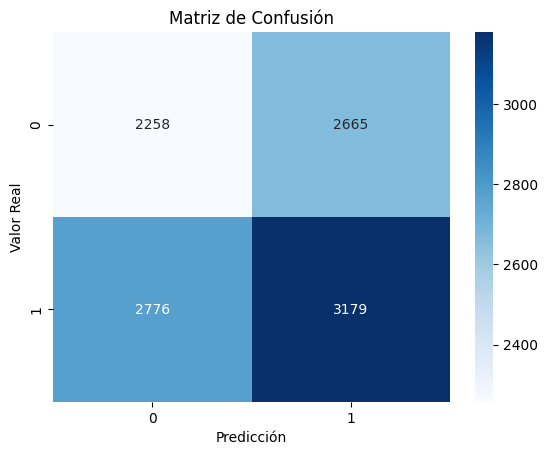

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

# Observamos los errores tipo 1 y tipo 2:

***Resultados:***

Verdaderos negativos (TN) = 4306 → Reseñas negativas que fueron correctamente clasificadas como negativas.

Falsos positivos (FP) = 547 → Reseñas negativas que el modelo clasificó incorrectamente como positivas.

Falsos negativos (FN) = 719 → Reseñas positivas que fueron clasificadas incorrectamente como negativas.

Verdaderos positivos (TP) = 5306 → Reseñas positivas correctamente clasificadas como positivas.

***A raiz de esto concluimos:***

El modelo comete más errores al predecir negativas que positivas (666 vs. 571), aunque el número es relativamente bajo respecto al total.

Aunque las reseñas positivas superan en cantidad a las negativas (TP-TN) podemos considerar que los valores mantienen un equilibrio relativo, ya que no distan mucho uno del otro.

**Palabras asociadas a reseñas positivas y negativas.**

Gracias al modelo de *Regresión Logistica*, podemos obtener los coeficientes que determinan cuanto contribuye a que la review sea positiva (coeficiente positivo) o negativa (coeficiente negativo). Con esos datos podemos crear las siguientes tablas donde vemos los 10 mejores y los 10 peores coeficientes y las palabras a la que corresponde ese valor.

In [ ]:
# Obtenemos las palabras del vocabulario
palabras = tfidf_vectorizer.get_feature_names_out()

# Coeficientes del modelo (uno por palabra)
coeficientes = model.coef_[0]

# Creamos un DataFrame para visualizarlo
df_coef = pd.DataFrame({'palabra': palabras, 'coeficiente': coeficientes})

# Ordenamos por importancia
df_coef = df_coef.sort_values(by='coeficiente', ascending=False)

# En la primera columna veremos el número "índice" de cada palabra según el órden en que fueron procesadas en el modelo.

# Mostramos las 10 palabras más asociadas a valoración positiva y negativa
print("🔼 Palabras más asociadas a reseñas positivas:")
print(df_coef.head(10))

print("\n🔽 Palabras más asociadas a reseñas negativas:")
print(df_coef.tail(10))

🔼 Palabras más asociadas a reseñas positivas:
         palabra  coeficiente
10804       love    10.574696
2306        best     8.341764
7924       great     7.933798
996      amazing     6.542938
1904     awesome     5.964877
7775        good     5.856569
5730        easy     5.494351
12187       nice     5.022958
6369   excellent     4.942333
18576      thank     4.129456

🔽 Palabras más asociadas a reseñas negativas:
              palabra  coeficiente
1926            awful    -3.605934
3083             cant    -3.938049
19868           worse    -4.053086
18538        terrible    -4.058598
7509          garbage    -4.127127
2835            buggy    -4.264137
19149           trash    -4.419850
8583         horrible    -4.427835
11480  misinformation    -4.929415
19873           worst    -6.551465


In [ ]:
# Aplicamos Validación cruzada para evaluar la robustez del modelo y asegurarnos
# que no esté sesgado por la partición aleatoria de los datos en entrenamiento y prueba.

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Pipeline que junta vectorizador y modelo
pipeline = make_pipeline(
    TfidfVectorizer(max_features=5000),
    LogisticRegression()
)

# Validación cruzada con 5 particiones (k-fold = 5)
scores = cross_val_score(pipeline, df['review_lema_str'], df['target'], cv=5, scoring='accuracy')

# Resultados
print(f"Precisión media con validación cruzada: {scores.mean():.3f}")
print(f"Desviación estándar: {scores.std():.3f}")

Precisión media con validación cruzada: 0.882
Desviación estándar: 0.010


# **RNN - Redes Neuronales Recurrentes**

Vamos a utilizar un nuevo modelo de aprendizaje

Lo primero que vamos a hacer es un preprocesamiento de Texto con Tokenizer y Padding en este bloque de código, realizamos el preprocesamiento de los datos de texto para convertir las reseñas en formato numérico, lo que es necesario para que un modelo de machine learning o deep learning pueda trabajar con ellas.

In [ ]:
# Definimos la cantidad máxima de palabras que queremos considerar en el vocabulario
max_words = 10000

# Definimos la longitud máxima que cada reseña puede tener
max_len = 100

# Creamos el tokenizador y configuramos el número máximo de palabras y un token para palabras desconocidas
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")

# Ajustamos el tokenizador al texto de las reseñas en español, esto genera un diccionario de índices de palabras
tokenizer.fit_on_texts(df['review_lema_str'])

# Convertimos las reseñas en texto a secuencias numéricas, donde cada palabra se representa por un índice
sequences = tokenizer.texts_to_sequences(df['review_lema_str'])

# Usamos pad_sequences para rellenar o recortar las secuencias de texto para que todas tengan la misma longitud
X = pad_sequences(sequences, maxlen=max_len, padding='post')

# Extraemos las etiquetas (valores 0 o 1, que podrían representar una valoración o clase binaria) como un arreglo NumPy
y = df['target'].values

 X ahora contiene un array de secuencias numéricas (en formato tensor o matriz), en las que cada número representa un índice de palabra del vocabulario.
 Estas secuencias están ajustadas para tener la misma longitud (max_len=100), con las más largas recortadas y las más cortas rellenadas con ceros.

In [ ]:
# Visualizamos el tipo de dato que es X
print(type(X))

print(X)

<class 'numpy.ndarray'>
[[  15    4   67 ...    0    0    0]
 [  31 1858  577 ...    0    0    0]
 [1301   19   25 ...    0    0    0]
 ...
 [   2   38   14 ...    0    0    0]
 [   2   14  302 ...    0    0    0]
 [  14   94   37 ...    0    0    0]]


Ahora vamos a dividir el conjunto de datos en entrenamiento y prueba, donde el 20% de los datos se utilizarán para pruebas, y el 80% restante se utilizará para entrenamiento.

In [ ]:

# Dividimos el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Definimos y compilamos el modelo RNN**

**Herramientas que utilizaremos:**

*Embedding:* Esta capa convierte los índices de las palabras en vectores densos de dimensión 64. Los vectores son entrenables, lo que significa que se ajustarán durante el entrenamiento para representar mejor las relaciones semánticas entre las palabras.

*SimpleRNN*: Es una capa recurrente que procesa secuencias. Con 64 unidades, el modelo es capaz de capturar dependencias de corto alcance en las secuencias de texto.

*Dense:* La capa de salida tiene una única neurona con una función de activación sigmoid, adecuada para clasificación binaria (por ejemplo, predecir si una reseña es positiva o negativa).

In [ ]:
# Creamos un modelo secuencial, es decir, apilamos las capas una tras otra
model_rnn = Sequential([

    # Capa de embedding: convierte cada índice de palabra en un vector de 64 dimensiones.
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),

    # Capa SimpleRNN: una capa recurrente que tiene 64 unidades (neuronas).
    SimpleRNN(64),

    # Capa de salida: una capa densa con una neurona, que usaremos para clasificación binaria.
    Dense(1, activation='sigmoid')
])

# Compilamos el modelo:
model_rnn.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


**Entrenamiento del modelo**

In [ ]:
# Entrenamos el modelo usando los datos de entrenamiento y validamos con los datos de prueba
history = model_rnn.fit(
    # 'X_train' son los datos de entrada (características de entrenamiento) y 'y_train' son las etiquetas (resultados deseados) correspondientes
    X_train, y_train,

    # 'epochs=5' indica cuántas veces el modelo recorrerá todo el conjunto de datos durante el entrenamiento
    # Cada "época" significa que el modelo ha visto todos los datos una vez
    epochs=15,

    # 'batch_size=32' especifica el tamaño del lote de datos que el modelo usará en cada actualización de los pesos
    # En cada paso del entrenamiento, el modelo ajusta sus pesos utilizando 32 ejemplos a la vez
    batch_size=32,

    # 'validation_data=(X_test, y_test)' se pasa el conjunto de datos de prueba para evaluar el modelo después de cada época
    # Esto permite verificar cómo el modelo está generalizando a nuevos datos (no vistos durante el entrenamiento)
    validation_data=(X_test, y_test)
)

Epoch 1/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 52s 36ms/step - accuracy: 0.6098 - loss: 0.6457 - val_accuracy: 0.4462 - val_loss: 0.6976
Epoch 2/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 53s 39ms/step - accuracy: 0.7834 - loss: 0.5176 - val_accuracy: 0.7947 - val_loss: 0.5074
Epoch 3/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 77s 36ms/step - accuracy: 0.8001 - loss: 0.5013 - val_accuracy: 0.7921 - val_loss: 0.5113
Epoch 4/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 49s 36ms/step - accuracy: 0.7983 - loss: 0.5039 - val_accuracy: 0.7896 - val_loss: 0.5147
Epoch 5/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 51s 37ms/step - accuracy: 0.7929 - loss: 0.5112 - val_accuracy: 0.7841 - val_loss: 0.5221
Epoch 6/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.7817 - loss: 0.5257 - val_accuracy: 0.7765 - val_loss: 0.5316
Epoch 7/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 70s 51ms/step - accuracy: 0.7787 - loss: 0.5293 - val_accuracy: 0.7659 - val_loss: 0.5459
Epoch 8/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 53s 39ms/step - accuracy: 0.7725 -

In [ ]:
# Evaluamos el modelo con los datos de prueba (x_test, y_test)
# Esto nos devolverá el valor de la función de pérdida y la métrica definida (accuracy)
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test, y_test)

# Mostramos los resultados
print(f"Pérdida en test: {loss_rnn:.4f}")
print(f"Accuracy en test: {accuracy_rnn:.4f}")

340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7894 - loss: 0.4818
Pérdida en test: 0.4715
Accuracy en test: 0.7943


***Conclusiones del entrenamiento:***

Podemos observar que entre las epocas 9 y 10 el accuracy disminuye aunque luego retoma y se estabiliza en las epocas siguientes.

*   accuracy: 84.48%
*   loss: 37.96%
*   val_accuracy: 79.43%
*   val_loss: 47.15%





# **LSTM**

Ahora vamos a entrenar una red neuronal con una capa LSTM (Long Short-Term Memory), que trabaja con secuencias de texto. Esta es capaz de recordar información a largo plazo mejor que las RNN simples. Usaremos un enfoque de clasificación binaria y veremos si los resultados cambian comparado con el modelo visto anteriormente.

**Creamos el modelo**

In [ ]:
model_lstm = Sequential([
    # Capa de Embedding
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),

    # Capa LSTM
    LSTM(64),

    # Capa de salida para clasificación binaria
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compilamos el modelo
model_lstm.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

**Entrenamiento**

In [ ]:
# Entrenamiento
# Entrenamos el modelo durante 5 épocas con lotes de 32 ejemplos.
# El modelo ajusta sus pesos internamente para minimizar la pérdida.
# Se calcula `loss` y `accuracy` en cada época sobre los datos de entrenamiento.

model_lstm.fit(X_train, y_train, batch_size=32, epochs=15,validation_data=(X_test, y_test))

Epoch 1/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 99s 71ms/step - accuracy: 0.5462 - loss: 0.6897 - val_accuracy: 0.5539 - val_loss: 0.6877
Epoch 2/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 95s 70ms/step - accuracy: 0.5454 - loss: 0.6892 - val_accuracy: 0.5539 - val_loss: 0.6875
Epoch 3/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 96s 70ms/step - accuracy: 0.5441 - loss: 0.6894 - val_accuracy: 0.5539 - val_loss: 0.6876
Epoch 4/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 95s 70ms/step - accuracy: 0.5455 - loss: 0.6891 - val_accuracy: 0.5539 - val_loss: 0.6874
Epoch 5/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 142s 70ms/step - accuracy: 0.5440 - loss: 0.6894 - val_accuracy: 0.5539 - val_loss: 0.6742
Epoch 6/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 150s 76ms/step - accuracy: 0.5433 - loss: 0.6763 - val_accuracy: 0.5390 - val_loss: 0.6728
Epoch 7/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 110s 81ms/step - accuracy: 0.5451 - loss: 0.6750 - val_accuracy: 0.5391 - val_loss: 0.6725
Epoch 8/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 99s 73ms/step - accuracy: 0.548

In [ ]:
# Evaluamos el modelo con los datos de prueba (x_test, y_test)
# Esto nos devolverá el valor de la función de pérdida y la métrica definida (accuracy)
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test)

# Mostramos los resultados
print(f"Pérdida en test: {loss_lstm:.4f}")
print(f"Accuracy en test: {accuracy_lstm:.4f}")

340/340 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8784 - loss: 0.3136
Pérdida en test: 0.3039
Accuracy en test: 0.8833


In [ ]:
# Mostramos el resumen del modelo
# Mostramos una tabla con las capas, la cantidad de parámetros entrenables y la forma de salida de cada una.

model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,019,269 (7.70 MB)

 Trainable params: 673,089 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,346,180 (5.14 MB)

Comparando con el modelo anterior se observa una mejora en los datos de entrenamiento y testeo manteniendose equilibrados durante todas las epocas.
La perdida del test disminuye a 30.39% mientras que el accuracy asciende a 88.33%

# **Conclusion**

Este proyecto demuestra cómo la ciencia de datos puede transformar feedback no estructurado (reseñas de usuarios) en insights accionables que generan valor tangible para empresas, usuarios y stakeholders. Más allá del caso específico de Spotify, representa un blueprint metodológico aplicable a cualquier producto digital que reciba feedback textual de usuarios.
La verdadera utilidad no está solo en los modelos técnicos (TF-IDF, RNN, etc.), sino en el puente que construyen entre datos y decisiones, entre quejas de usuarios y mejoras de producto, entre inversión en desarrollo y satisfacción del cliente.
En un mundo donde la experiencia del usuario es el principal diferenciador competitivo, proyectos como este no son un lujo, sino una necesidad estratégica.